# Domain Knowledge
This dataset contains historical weather parameter of Dhaka

Source : Bangladesh Meteorological Department

There are 4 attribute in this data set out of which 3 are features and 1 class attribute as below. Also, there are 306 instances of data.

    1.YEAR- Observation year 
    2.Month- Month
    3.MaxTemp- Mean Maximum temprature per month (Unit-celsius)
    4.MinTemp- Mean Minimum temprature per month (Unit-celsius)
    4.RelativeHumidity- Mean RelativeHumidity per month (Unit-%)
    5.Rainfall- Total Rainfall per month (Unit-mm)

###### Importing necessary Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

###### Load data set

In [2]:
url='https://raw.githubusercontent.com/FazlyRabbiBD/Data-Science-Book/master/data-dhaka-weather1953-2016.csv'
df = pd.read_csv(url)

In [7]:
df

,YEAR,Month,MaxTemp,MinTemp,RelativeHumidity,Rainfall
0,1953,1,26.70,10.9,70,10.0
1,1953,2,33.60,14.7,65,2.0
2,1953,3,37.50,21.7,73,90.0
3,1953,4,37.70,23.4,69,90.0
4,1953,5,34.70,24.2,81,274.0
...,...,...,...,...,...,...
763,2016,8,33.28,26.8,78,169.9
764,2016,9,32.87,26.6,82,138.5
765,2016,10,33.07,25.2,75,76.6
766,2016,11,29.60,20.2,73,24.1


###### Investigate the data set

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   YEAR              768 non-null    int64  
 1   Month             768 non-null    int64  
 2   MaxTemp           768 non-null    float64
 3   MinTemp           768 non-null    float64
 4   RelativeHumidity  768 non-null    int64  
 5   Rainfall          768 non-null    float64
dtypes: float64(3), int64(3)
memory usage: 36.1 KB


In [9]:
df.describe()

,YEAR,Month,MaxTemp,MinTemp,RelativeHumidity,Rainfall
count,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,1984.500000,6.500000,33.438529,21.51875,75.207031,168.377214
std,18.484992,3.454302,2.964510,4.97461,8.593081,173.784463
min,1953.000000,1.000000,24.300000,9.50000,49.000000,0.000000
25%,1968.750000,3.750000,31.875000,17.15000,69.000000,13.000000
50%,1984.500000,6.500000,33.900000,23.70000,76.000000,121.000000
75%,2000.250000,9.250000,35.525000,25.80000,83.000000,273.250000
max,2016.000000,12.000000,40.800000,28.10000,90.000000,856.000000


In [10]:
df.shape

(768, 6)

###### Checking null values

In [12]:
df.isnull().sum()

YEAR                0
Month               0
MaxTemp             0
MinTemp             0
RelativeHumidity    0
Rainfall            0
dtype: int64

###### EDA

In [13]:
df.corr()

,YEAR,Month,MaxTemp,MinTemp,RelativeHumidity,Rainfall
YEAR,1.000000e+00,7.480458e-16,0.044080,0.098500,-0.165042,-0.009006
Month,7.480458e-16,1.000000e+00,-0.134986,0.210387,0.481070,0.125966
MaxTemp,4.407971e-02,-1.349862e-01,1.000000,0.724186,0.097398,0.365135
MinTemp,9.849999e-02,2.103873e-01,0.724186,1.000000,0.624770,0.687317
RelativeHumidity,-1.650420e-01,4.810704e-01,0.097398,0.624770,1.000000,0.708577
Rainfall,-9.006300e-03,1.259665e-01,0.365135,0.687317,0.708577,1.000000


In [14]:
df.cov()

,YEAR,Month,MaxTemp,MinTemp,RelativeHumidity,Rainfall
YEAR,341.694915,0.000000,2.415522,9.057627,-26.215776,-28.931877
Month,0.000000,11.932203,-1.382301,3.615254,14.279661,75.618188
MaxTemp,2.415522,-1.382301,8.788322,10.679776,2.481152,188.112180
MinTemp,9.057627,3.615254,10.679776,24.746741,26.707195,594.192592
RelativeHumidity,-26.215776,14.279661,2.481152,26.707195,73.841046,1058.149704
Rainfall,-28.931877,75.618188,188.112180,594.192592,1058.149704,30201.039519


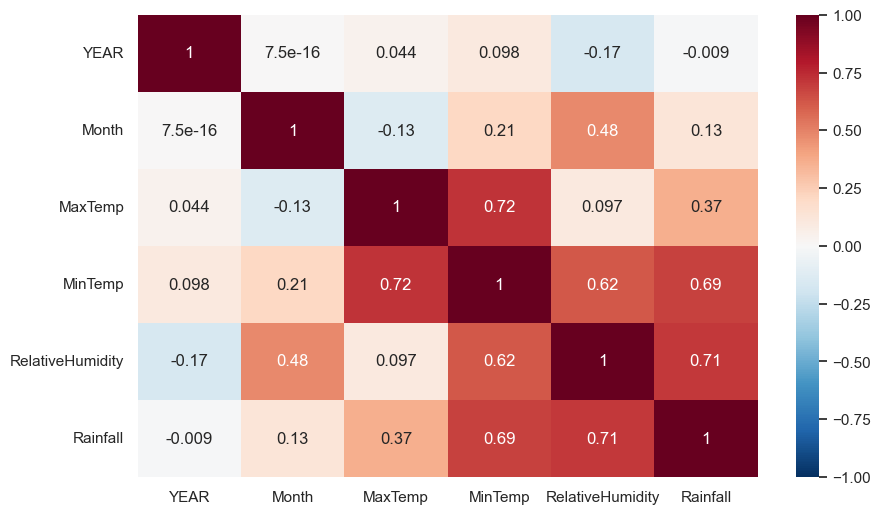

In [83]:
# Generating Heatmap
plt.figure(figsize=(10, 6))
sns.set()
correlation = df.corr()
sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")
plt.show()

###### Most Rainfall by Month

In [84]:
rain = df.groupby('Month')['Rainfall'].mean()
rain.sort_values(ascending=False)

Month
7     382.076563
6     360.075000
8     313.971875
9     284.639063
5     271.131250
10    164.120313
4     126.431250
3      54.307812
11     28.017187
2      19.703125
12      9.271875
1       6.781250
Name: Rainfall, dtype: float64

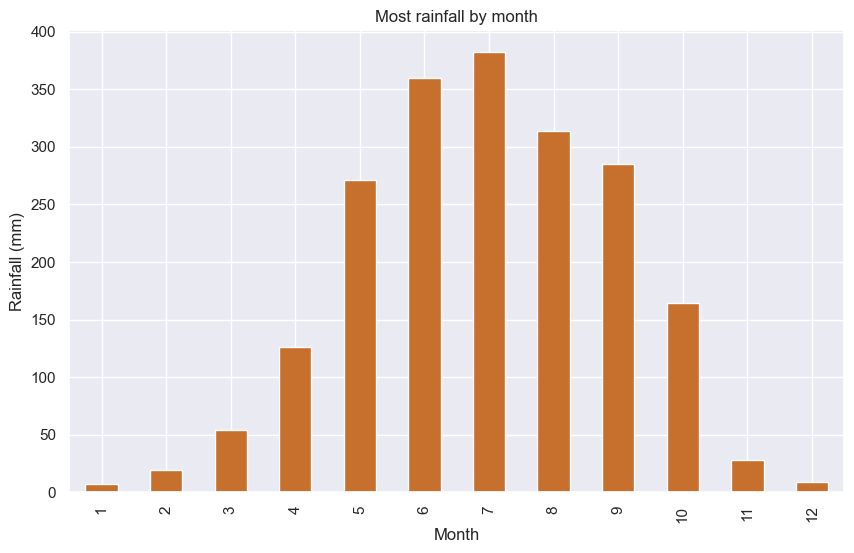

In [108]:
plt.figure(figsize=(10, 6))
sns.set()
rain.plot(kind='bar', color='#c7702e')
plt.xlabel('Month')
plt.ylabel('Rainfall (mm)')
plt.title('Most rainfall by month')

# Show plot
plt.show()

###### Month wise distribution

     

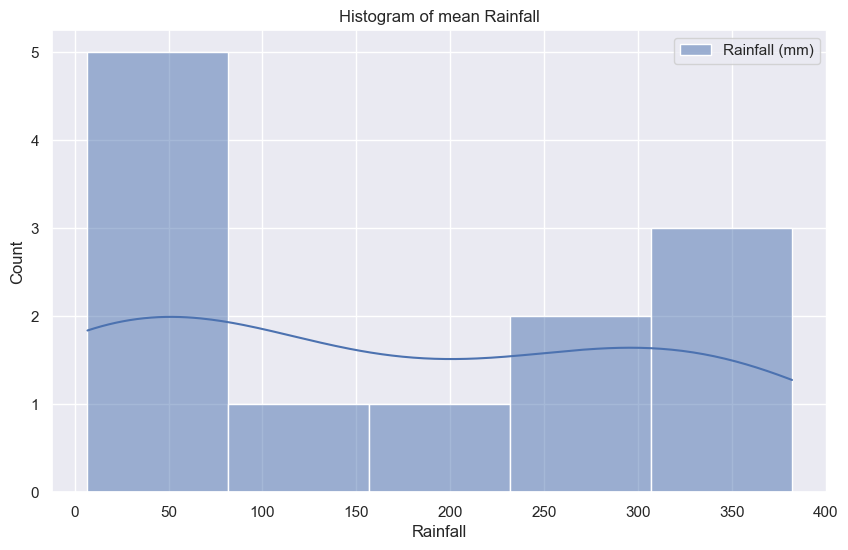

In [95]:
# Plot histogram in prper format
plt.figure(figsize=(10, 6))
sns.set() # for style
 
sns.histplot(rain, kde=True, label="Rainfall (mm)")
 
plt.title("Histogram of mean Rainfall") # for histogram title
plt.legend() # for label

###### Most MaxTemp by Month

In [104]:
max_temp = df.groupby('Month')['MaxTemp'].mean()
max_temp.sort_values(ascending=False)

Month
4     36.922656
5     36.211875
3     36.103281
6     35.088594
9     34.450469
8     34.109219
10    33.815000
7     33.766250
2     31.980000
11    31.775469
12    28.734219
1     28.305312
Name: MaxTemp, dtype: float64

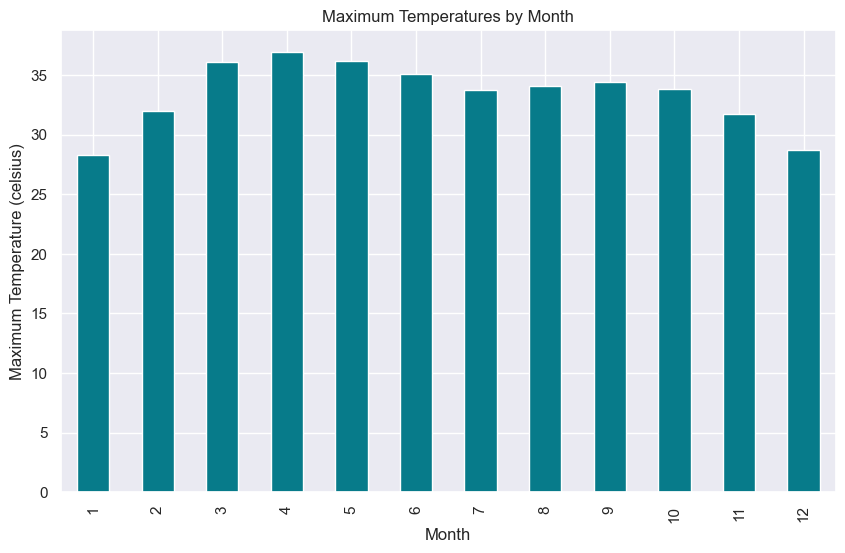

In [124]:
plt.figure(figsize=(10, 6))
sns.set()
max_temp.plot(kind='bar', color='#077b8a')
plt.xlabel('Month')
plt.ylabel('Maximum Temperature (celsius)')
plt.title('Maximum Temperatures by Month')

# Show plot
plt.show()

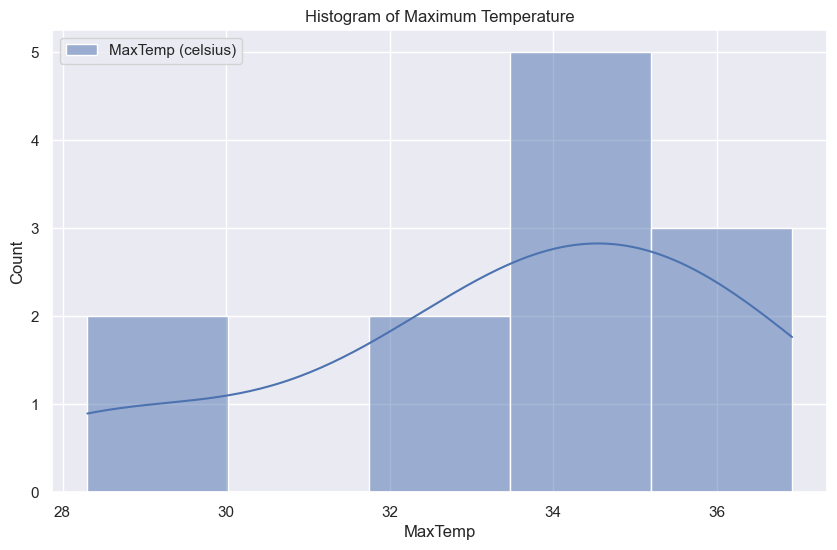

In [115]:
plt.figure(figsize=(10, 6))
sns.set()
sns.histplot(max_temp, kde=True, label="MaxTemp (celsius)")
 
plt.title("Histogram of Maximum Temperature")
plt.legend()

###### Most MinTemp by Month

In [117]:
min_temp = df.groupby('Month')['MinTemp'].mean()
min_temp.sort_values(ascending=True)

Month
1     12.548438
12    14.167188
2     15.526563
11    18.815625
3     20.400000
4     23.737500
10    23.804688
5     24.803125
9     25.910937
6     26.035937
7     26.217188
8     26.257812
Name: MinTemp, dtype: float64

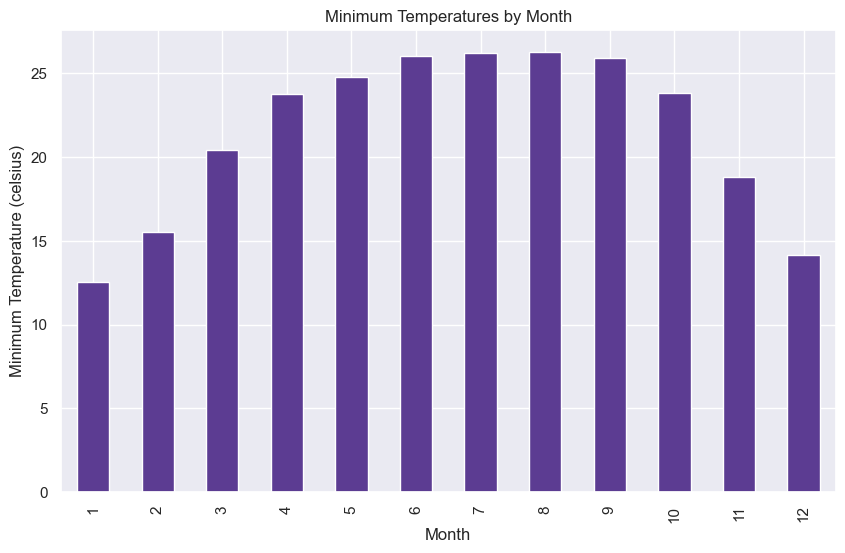

In [135]:
plt.figure(figsize=(10, 6))
sns.set()
min_temp.plot(kind='bar', color='#5c3c92')
plt.xlabel('Month')
plt.ylabel('Minimum Temperature (celsius)')
plt.title('Minimum Temperatures by Month')

# Show plot
plt.show()

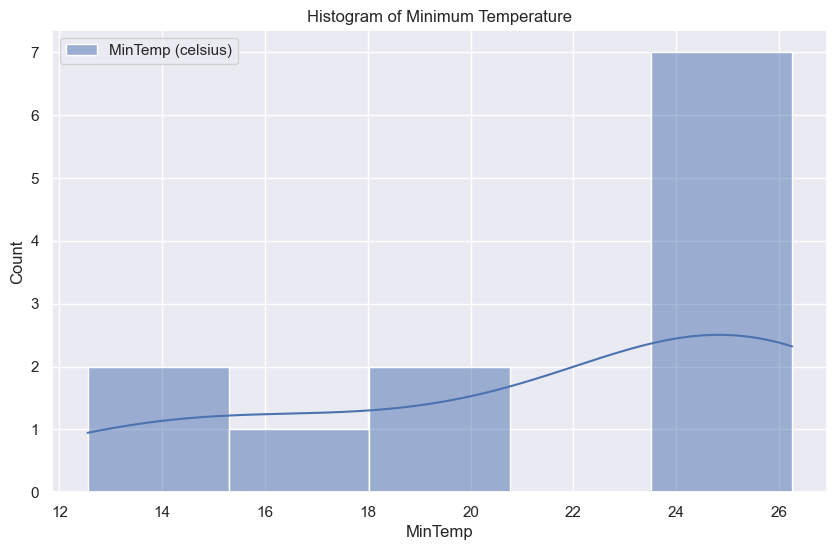

In [119]:
plt.figure(figsize=(10, 6))
sns.set()
sns.histplot(min_temp, kde=True, label="MinTemp (celsius)")
 
plt.title("Histogram of Minimum Temperature")
plt.legend()

###### Most RelativeHumidity by Month

In [127]:
relative_humidity = df.groupby('Month')['RelativeHumidity'].mean()
relative_humidity.sort_values(ascending=False)

Month
7     84.640625
8     83.781250
6     83.562500
9     83.562500
10    79.296875
5     77.171875
11    73.390625
12    72.906250
4     70.218750
1     69.828125
2     62.968750
3     61.156250
Name: RelativeHumidity, dtype: float64

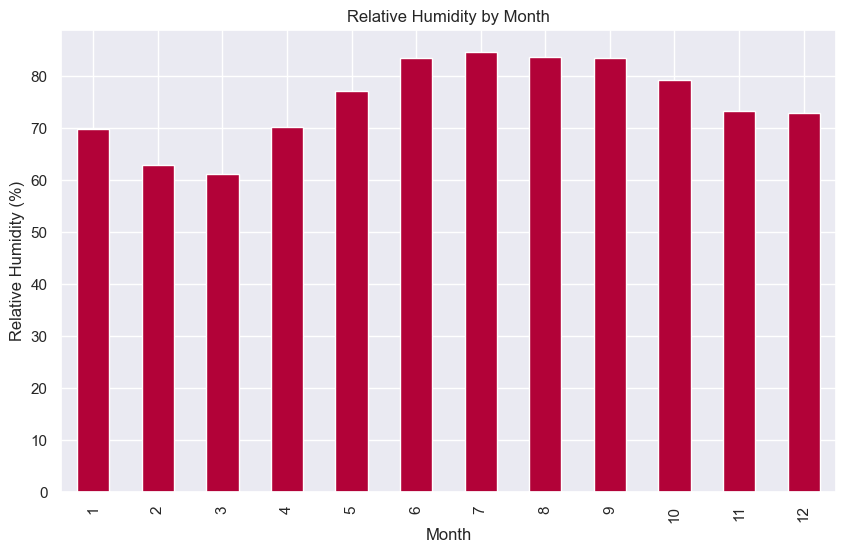

In [130]:
plt.figure(figsize=(10, 6))
sns.set()
relative_humidity.plot(kind='bar', color='#b20238')
plt.xlabel('Month')
plt.ylabel('Relative Humidity (%)')
plt.title('Relative Humidity by Month')

# Show plot
plt.show()

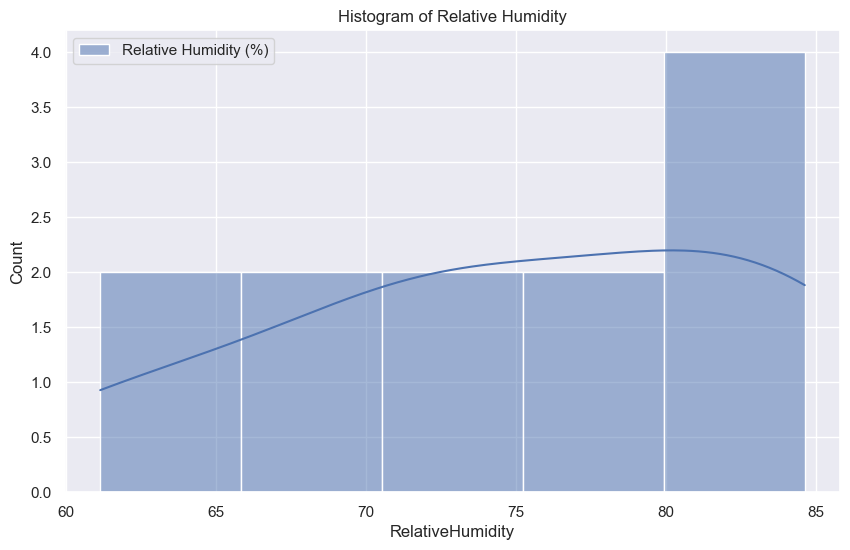

In [132]:
plt.figure(figsize=(10, 6))
sns.set()
sns.histplot(relative_humidity, kde=True, label="Relative Humidity (%)")
 
plt.title("Histogram of Relative Humidity")
plt.legend()

###### Visualizing Boxplot

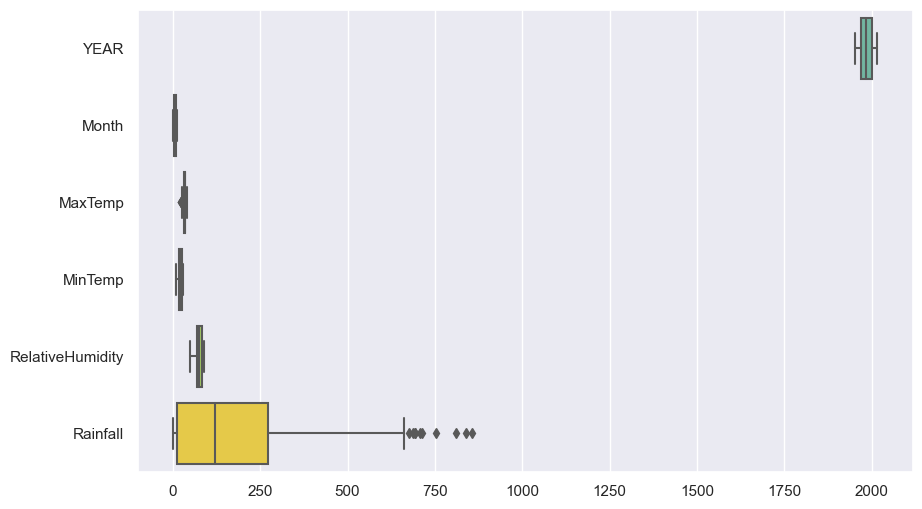

In [137]:
plt.figure(figsize=(10, 6))
sns.set()
ax = sns.boxplot(data=df, orient="h", palette="Set2")

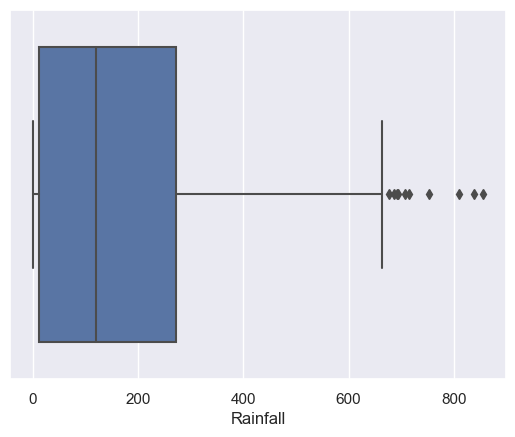

In [151]:
# Rainfall Boxplot
ax = sns.boxplot(x=df["Rainfall"])

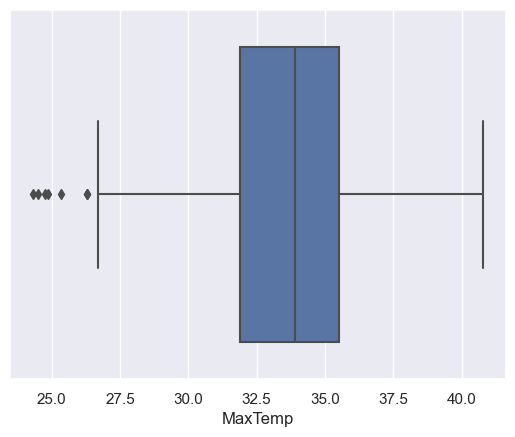

In [150]:
# MaxTemp Boxplot
ax = sns.boxplot(x=df["MaxTemp"])

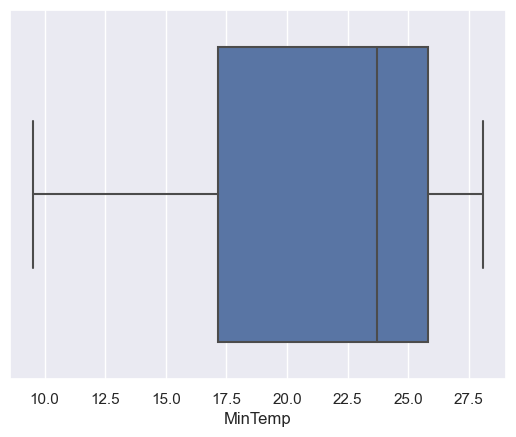

In [149]:
# MinTemp Boxplot
ax = sns.boxplot(x=df["MinTemp"])

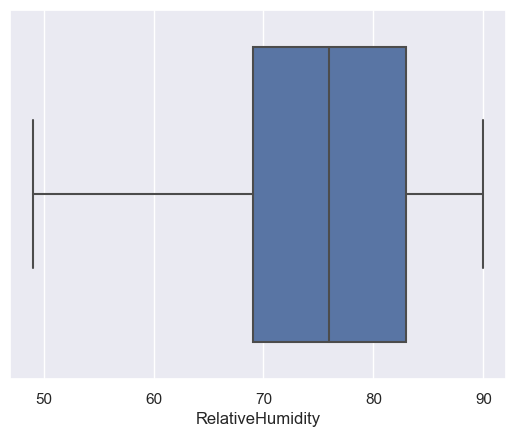

In [148]:
# RelativeHumidity Boxplot
ax = sns.boxplot(x=df["RelativeHumidity"])

###### Two variables Boxplot together

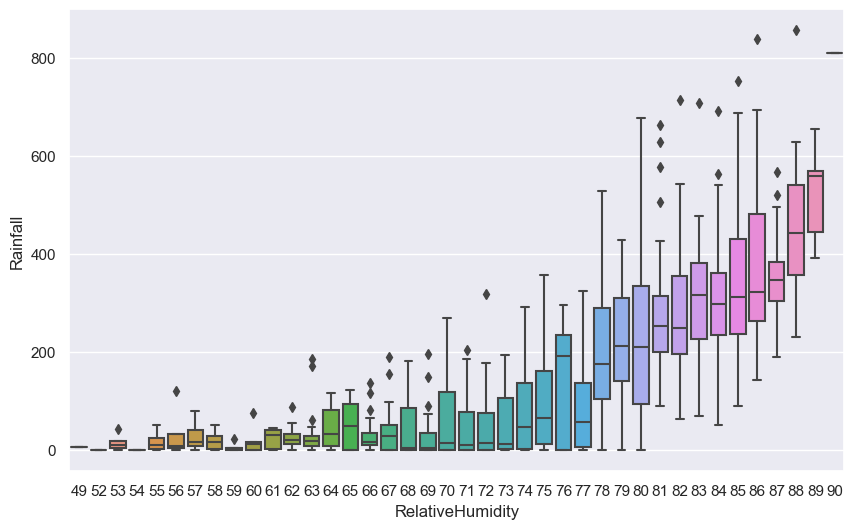

In [153]:
plt.figure(figsize=(10, 6))
sns.set()
ax = sns.boxplot(x="RelativeHumidity", y="Rainfall", data=df)

From the boxplot of RelativeHumidity and Rainfall, we see that as humidity increases, so does rainfall. 

###### Category Boxplot
Categorical boxplot allows us to boxplot categorical variables with any other variable.

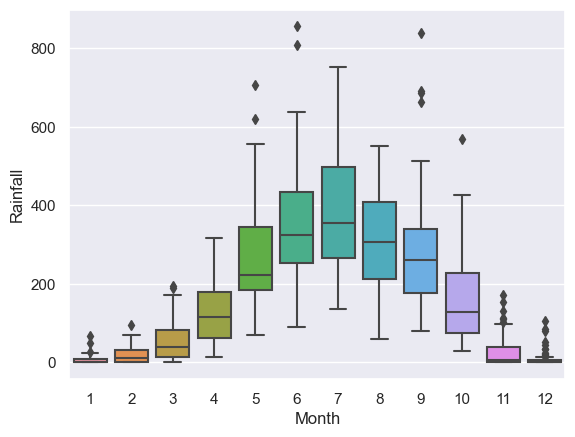

In [157]:
# Month vs Rainfall
ax = sns.boxplot(x="Month", y="Rainfall", data=df)

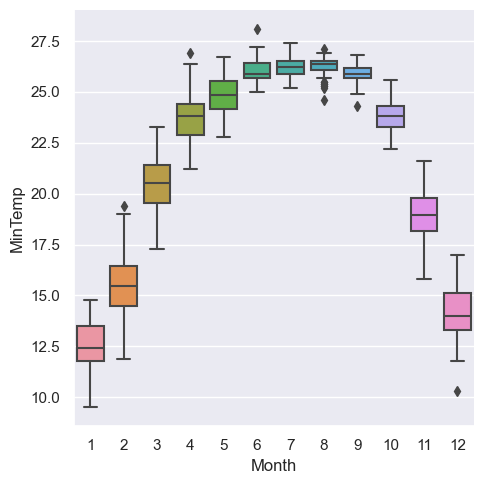

In [158]:
# Month vs MinTemp
ax=sns.catplot(x="Month", y="MinTemp", kind="box", data=df)

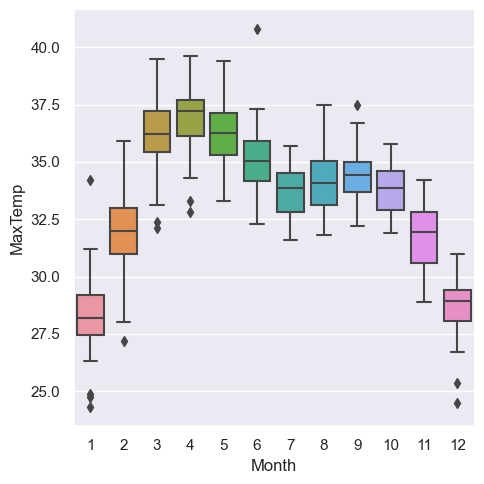

In [159]:
# Month vs MaxTemp
ax=sns.catplot(x="Month", y="MaxTemp", kind="box", data=df)

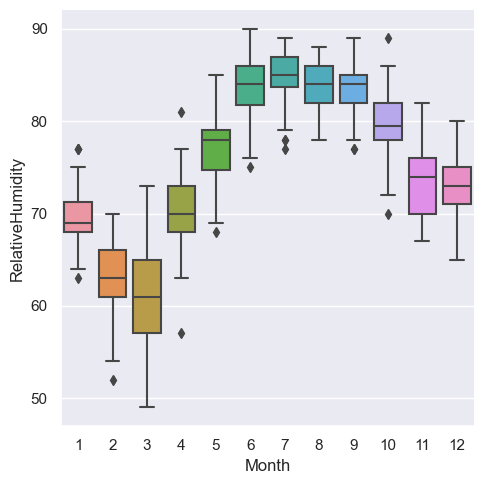

In [160]:
# Month vs RelativeHumidity
ax=sns.catplot(x="Month", y="RelativeHumidity", kind="box", data=df)

###### Histogram of our data set

array([[<AxesSubplot: title={'center': 'YEAR'}>,
        <AxesSubplot: title={'center': 'Month'}>],
       [<AxesSubplot: title={'center': 'MaxTemp'}>,
        <AxesSubplot: title={'center': 'MinTemp'}>],
       [<AxesSubplot: title={'center': 'RelativeHumidity'}>,
        <AxesSubplot: title={'center': 'Rainfall'}>]], dtype=object)

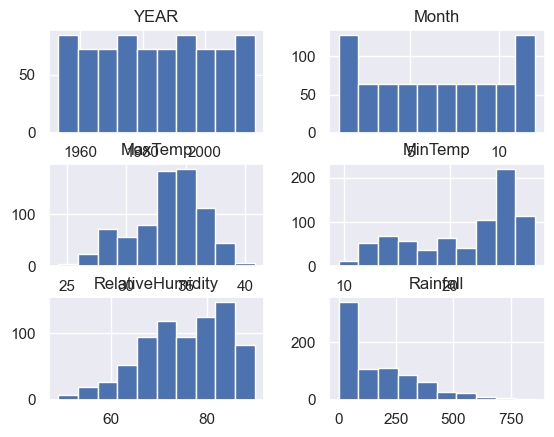

In [167]:
df.hist()

###### Pairplot

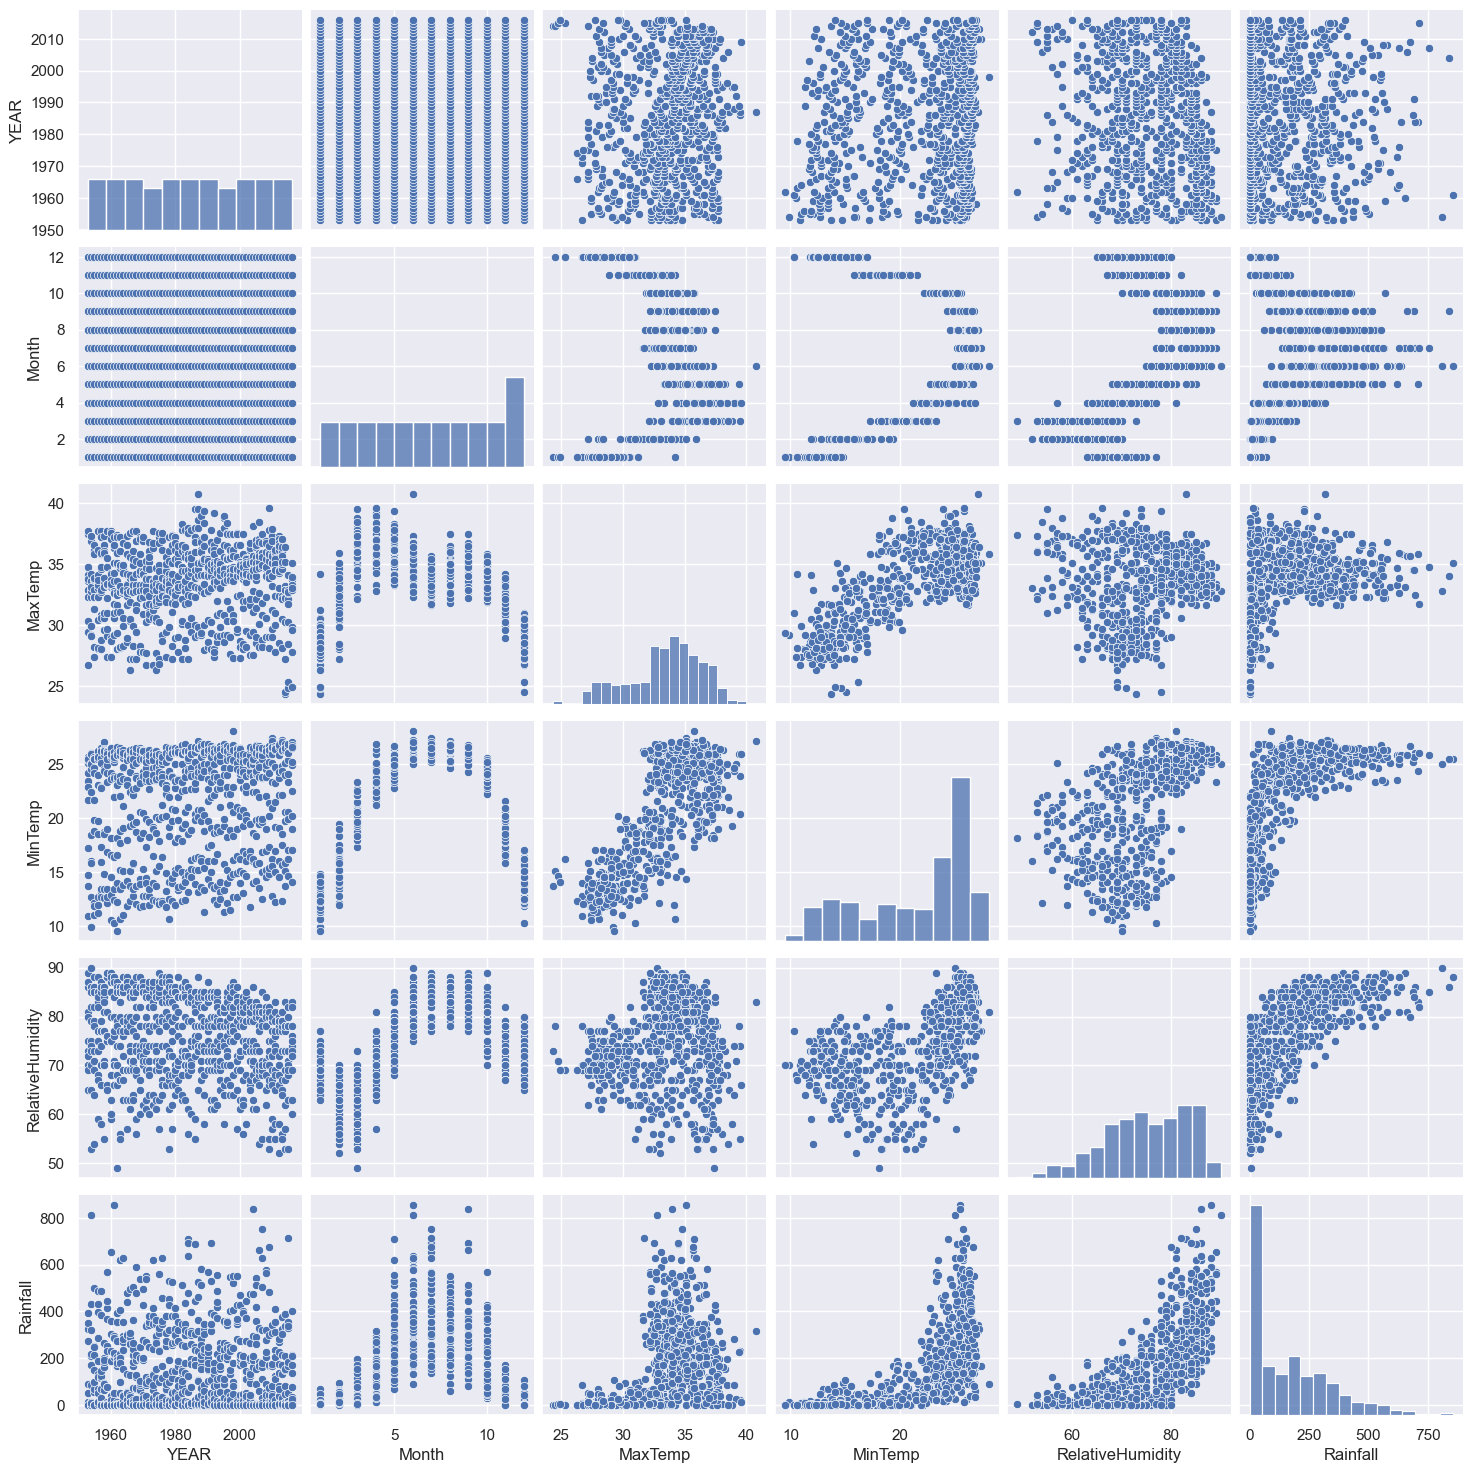

In [169]:
sns.pairplot(df);

###### Scatter plot

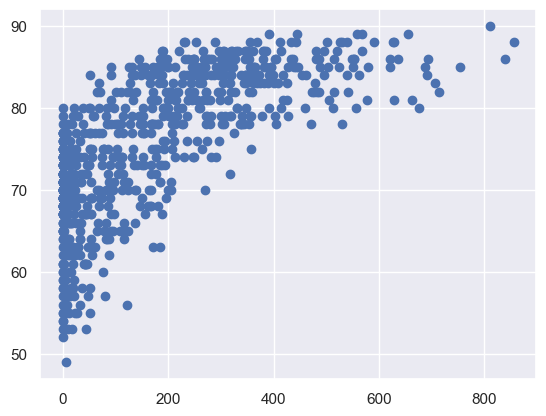

In [170]:
plt.scatter(df.Rainfall, df.RelativeHumidity)

###### Joint plot

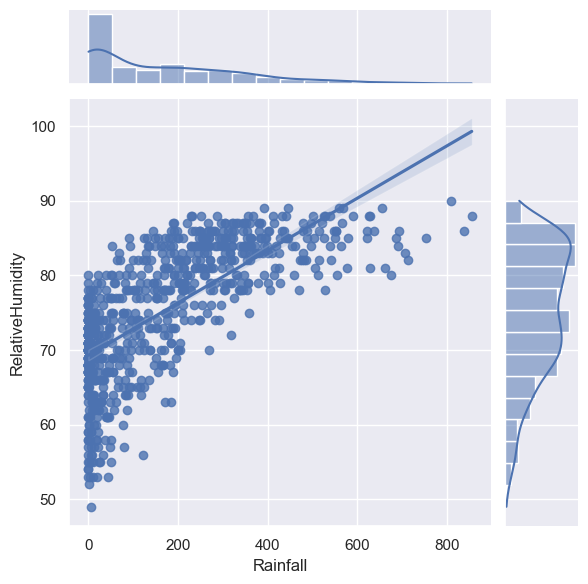

In [171]:
sns.jointplot(x="Rainfall", y="RelativeHumidity", data=df, kind="reg");

###### Time Series plot (TS plot)

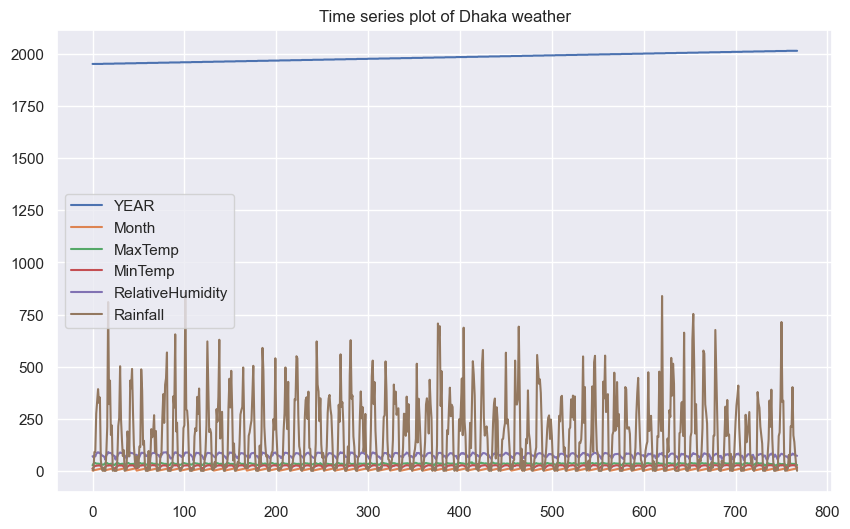

In [178]:
#Overall TS plot using matplotlib
import matplotlib.pyplot as plt

df.plot(figsize=(10, 6))
plt.title("Time series plot of Dhaka weather")
plt.show()

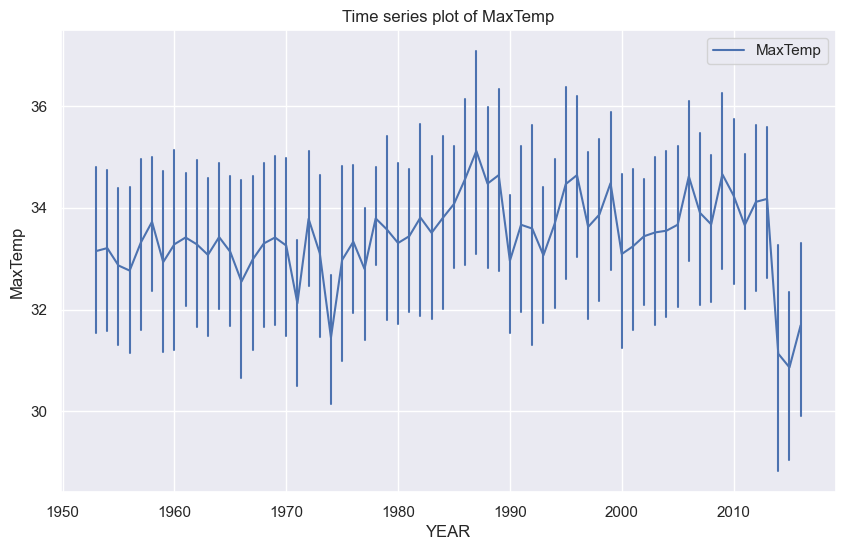

In [177]:
#MaxTemp TS plot using sns
plt.figure(figsize=(10, 6))
plt.title('Time series plot of MaxTemp')
ax = sns.lineplot(x="YEAR", y="MaxTemp", err_style="bars", label="MaxTemp", errorbar=('ci', 95), data=df)

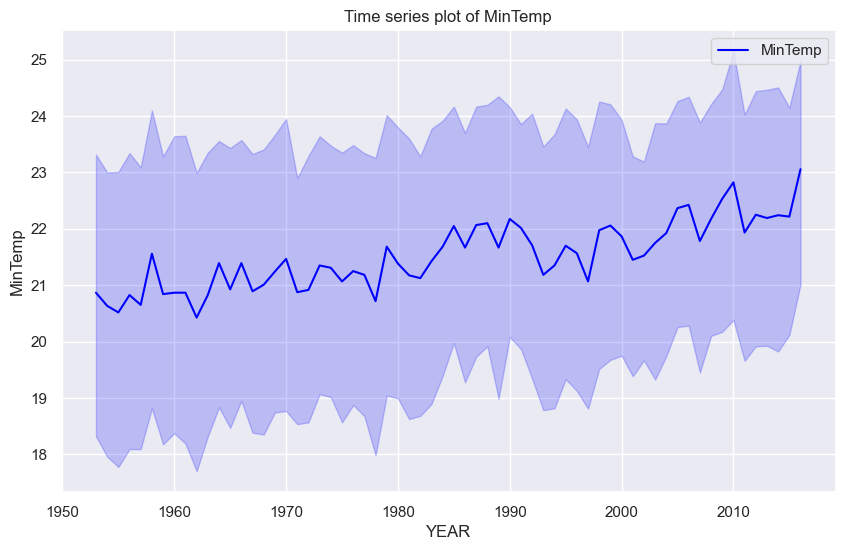

In [181]:
#MinTemp TS plot using sns
plt.figure(figsize=(10, 6))
plt.title('Time series plot of MinTemp')
ax = sns.lineplot(x="YEAR", y="MinTemp", color="blue", errorbar=('ci', 90), label="MinTemp", data=df)

From the figure, we can see that the minimum air temperature has gradually increased from 1953 to 2016.

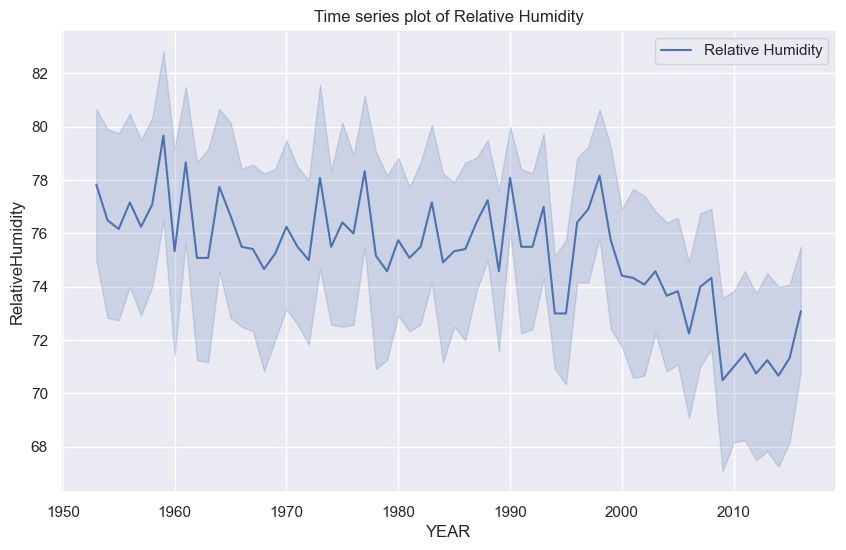

In [183]:
#Relative HumidityTS plot using sns
plt.figure(figsize=(10, 6))
plt.title('Time series plot of Relative Humidity')
ax = sns.lineplot(x="YEAR", y="RelativeHumidity", label="Relative Humidity", errorbar=('ci', 80), data=df)

From the 1953–2016 time series with average annual humidity, we can see that air humidity has gradually decreased.

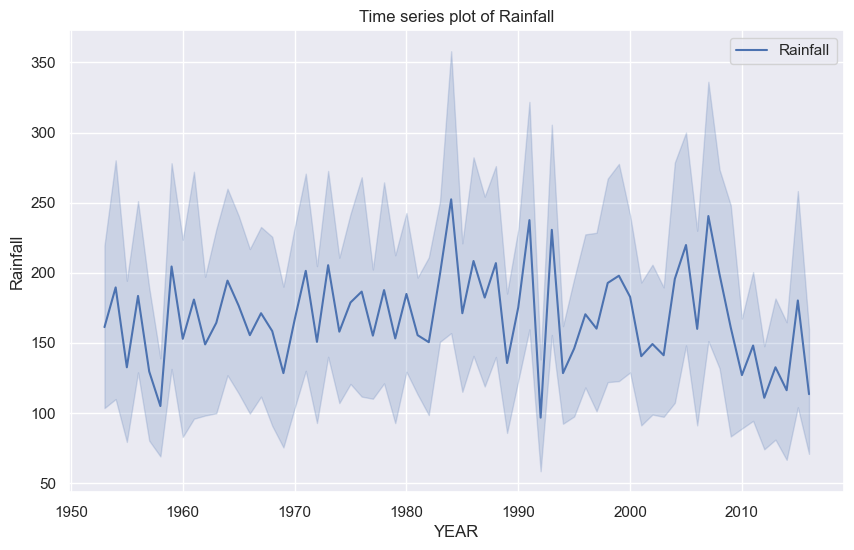

In [184]:
#Relative HumidityTS plot using sns
plt.figure(figsize=(10, 6))
plt.title('Time series plot of Rainfall')
ax = sns.lineplot(x="YEAR", y="Rainfall", label="Rainfall", errorbar=('ci', 80), data=df)

###### Yearly Min Temp Change

In [186]:
min = df.groupby('YEAR')['MinTemp'].mean()
min

YEAR
1953    20.866667
1954    20.633333
1955    20.516667
1956    20.825000
1957    20.650000
          ...    
2012    22.250000
2013    22.191667
2014    22.241667
2015    22.216667
2016    23.058333
Name: MinTemp, Length: 64, dtype: float64

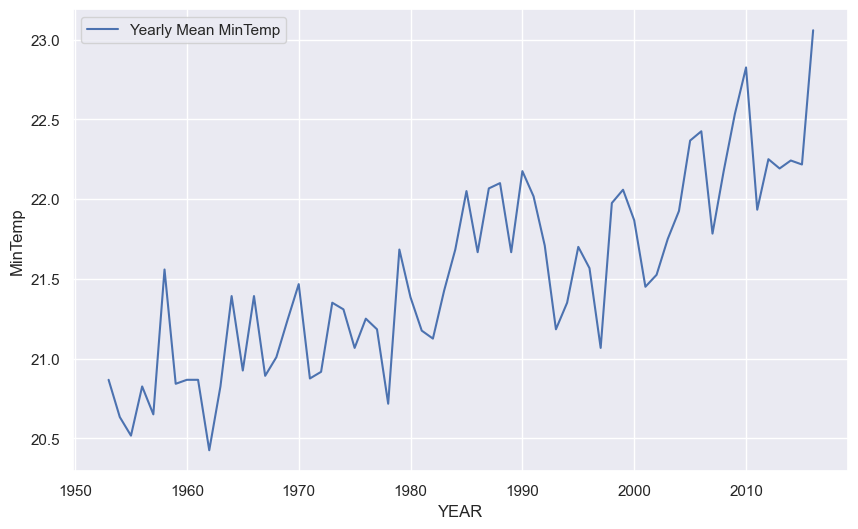

In [195]:
#Yearly mean MinTemp Changes plot
plt.figure(figsize=(10, 6))
ax = sns.lineplot(label="Yearly Mean MinTemp", data=min)

###### Yearly Changes 

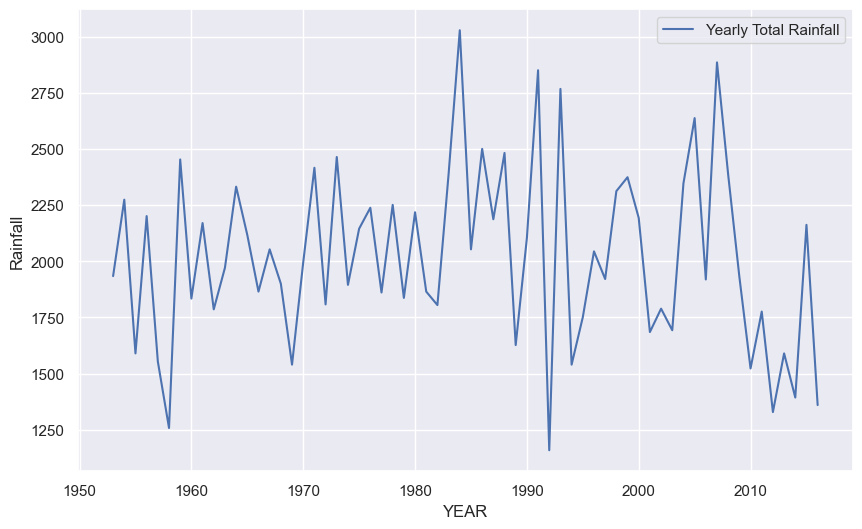

In [194]:
#Yearly Rainfall Changes

rainfall=df.groupby('YEAR')['Rainfall'].sum()
plt.figure(figsize=(10, 6))
ax = sns.lineplot(label="Yearly Total Rainfall", data=rainfall)

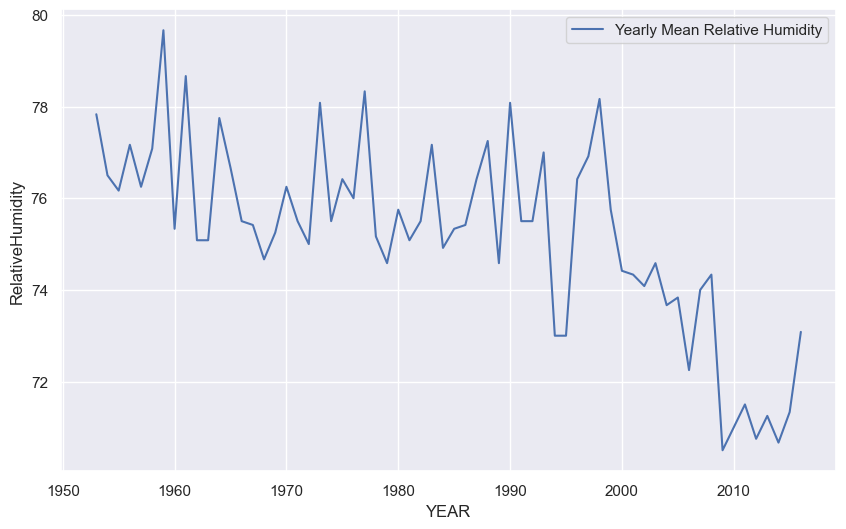

In [197]:
#Yearly Mean RelativeHumidity Changes
rh=df.groupby('YEAR')['RelativeHumidity'].mean()
plt.figure(figsize=(10, 6))
ax = sns.lineplot(label="Yearly Mean Relative Humidity", data=rh)

## Findings from EDA

1. Data set has no null values
2. Data set is needed to be normalized
3. Rainfall contains most extreme values
4. Jun, July and August are most Rainy Months
5. April, May, Jun and July are most Max Temprature Months
6. December, January and February are most Min Temprature Months
7. Jun, July and August has Highly Relative Humidity
8. Rainfall & Humidity are highly Correlated
9. Minimum Temprature has 2nd highest correlation with Rainfall
10. Relative humidity has a down trend over the time
10. MinTemp has a up trend over the time
11. Rainfall has Seasonality